In [2]:
import pandas as pd



# Import data from CSV and use describe function

In [3]:
dtype_specifications = {
    'OrderID': int,
    'CustomerID': int,
    'ProductID': int,
    'OrderDate': str,  # Keep as string for now, convert to datetime later if needed
    'Quantity': int,
    'Price': float,
    'City': str
}
data = pd.read_csv("sales_data.csv",dtype=dtype_specifications)

data.describe()

,OrderID,CustomerID,ProductID,Quantity,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,105.542000,502.492000,5.415000,15.475130
std,288.819436,2.937152,1.129253,2.836692,5.950693
min,1.000000,101.000000,501.000000,1.000000,5.010000
25%,250.750000,103.000000,501.000000,3.000000,10.280000
50%,500.500000,106.000000,503.000000,5.000000,15.590000
75%,750.250000,108.000000,504.000000,8.000000,20.412500
max,1000.000000,110.000000,504.000000,10.000000,25.960000


# Display the total quantity of items sold each month

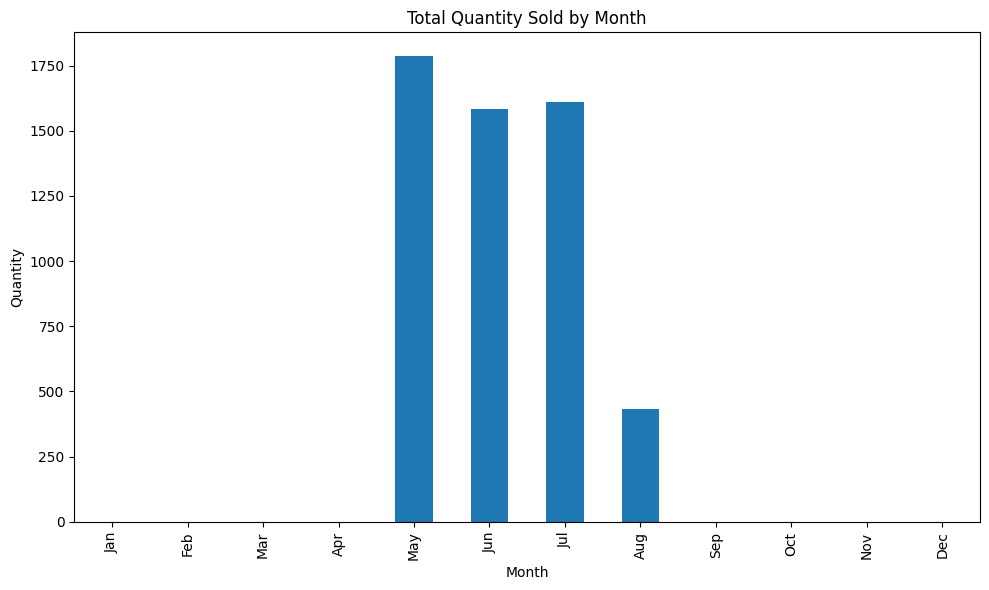

In [ ]:
import matplotlib.pyplot as plt

data['OrderDate'] = pd.to_datetime(data['OrderDate'])

copy_data = data.copy()

# Make a new data frame and add another column called Total quantity that exactly matches quantity
copy_data['TotalQuantity'] = copy_data['Quantity']

# Group by month and sum the quantities in a new series
monthly_quantity = copy_data.groupby(data['OrderDate'].dt.month)['TotalQuantity'].sum()

# Filling months with no data as 0
monthly_quantity = monthly_quantity.reindex(range(1, 13), fill_value=0)  

# Convert month numbers to month names using appropriate indexing
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# Mutate the DataFrame to match months index with their names
monthly_quantity.index = month_names

# Define the size of the Bar Graph
plt.figure(figsize=(10, 6))
# Plot the total Quantity per Month as a bar chart
monthly_quantity.plot(kind='bar')
# Title for the Bar chart
plt.title('Total Quantity Sold by Month')
#Set label for X and Y axis
plt.xlabel('Month')
plt.ylabel('Quantity')
#Adjust spacing of the bars to ensure they fit in the Spacing defined
plt.tight_layout()

plt.show()

# Find the most sold product in may

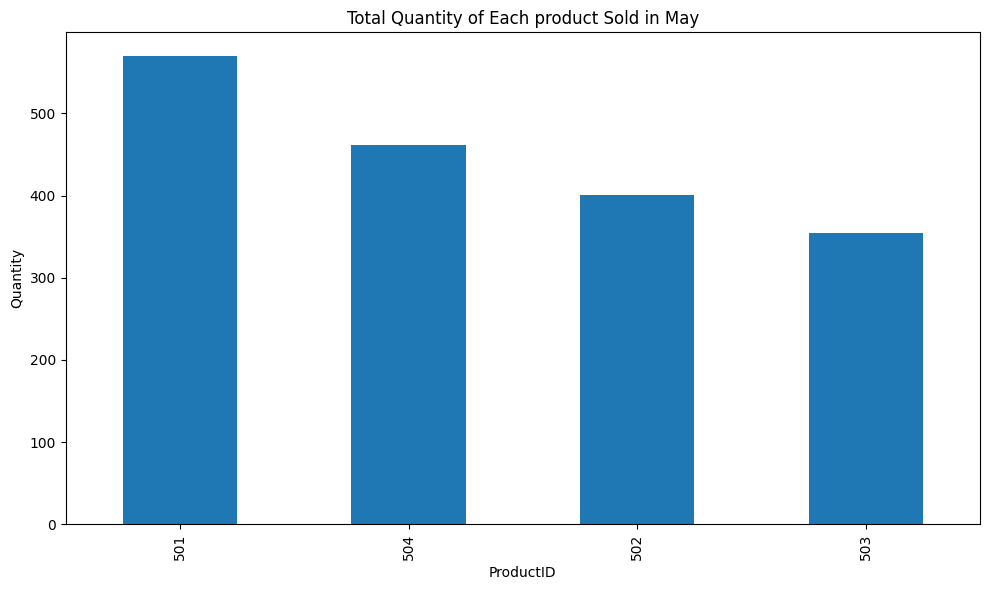

In [5]:
import matplotlib.pyplot as plt
# Ensure OrderDate is in datetime format
data['OrderDate'] = pd.to_datetime(data['OrderDate'])
# Create a Dataframe of only the rows in the month May
filtered_data = data[data['OrderDate'].dt.month == 5].copy()
# Calculate total Quantity per product
quantity_per_product = filtered_data.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False)

# Define the size of the Bar Graph
plt.figure(figsize=(10, 6))
# Plot the total spending per city as a bar chart
quantity_per_product.plot(kind='bar')
# Title for the Bar chart
plt.title('Total Quantity of Each product Sold in May')
#Set label for X and Y axis
plt.xlabel('ProductID')
plt.ylabel('Quantity')
#Adjust spacing of the bars to ensure they fit in the Spacing defined
plt.tight_layout()

plt.show()


# Total spending for cities in the month of may

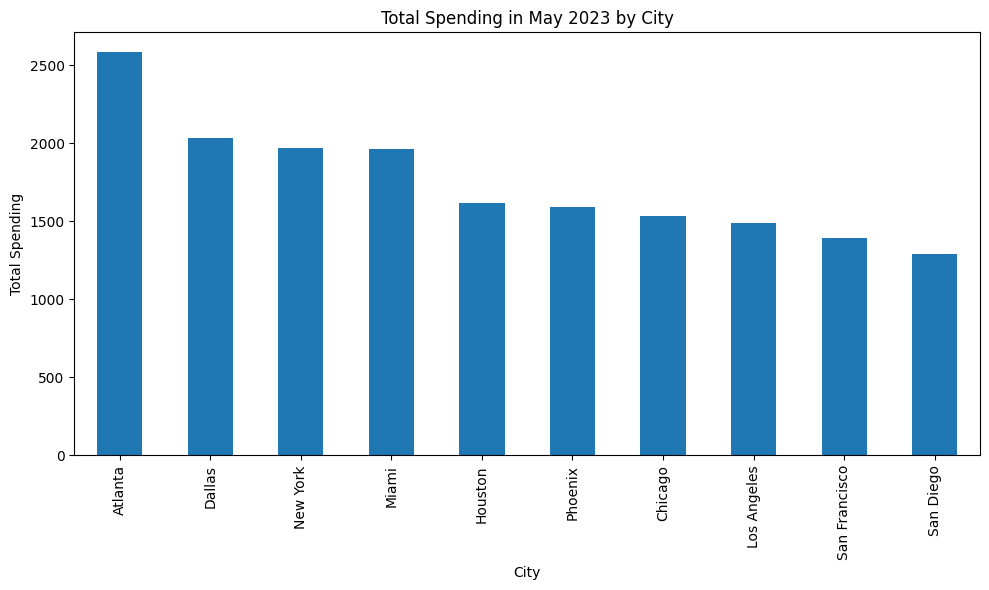

In [15]:
import matplotlib.pyplot as plt

# Ensure OrderDate is in datetime format
data['OrderDate'] = pd.to_datetime(data['OrderDate'])
# Create a Dataframe of only the rows in the month May
filtered_data = data[data['OrderDate'].dt.month == 5].copy()
# Create a new column in the DF, of the total Cost of each transaction
filtered_data['TotalSpending'] = filtered_data['Price'] * filtered_data['Quantity']

# Use groupby() and Sum() to total the values by the city.
spending_per_city = filtered_data.groupby('City')['TotalSpending'].sum().sort_values(ascending=False)

# Define the size of the Bar Graph
plt.figure(figsize=(10, 6))
# Plot the total spending per city as a bar chart
spending_per_city.plot(kind='bar')
# Title for the Bar chart
plt.title('Total Spending in May 2023 by City')
#Set label for X and Y axis
plt.xlabel('City')
plt.ylabel('Total Spending')
#Adjust spacing of the bars to ensure they fit in the Spacing defined
plt.tight_layout()

plt.show()

# Create a new dataset
<p style="font-size:16px;">As we can see this Data set is not very good for our project. The 3 products (501,502,503) do not have a fixed price and we only have sales in the months of May-Aug, this is not <br>
realistic and makes it harder for our analysis to find trends. So lets create a new Data set, well create a fixed price for each product and ensure that every month has several <br> sales 
for a more realistic simulation of Data.
</p>

# New data set

In [7]:
dtype_specifications = {
    'OrderID': int,
    'CustomerID': int,
    'ProductID': int,
    'OrderDate': str,  # Keep as string for now, convert to datetime later if needed
    'Quantity': int,
    'Price': float,
    'City': str
}
data = pd.read_csv("new_data.csv",dtype=dtype_specifications)

data.describe()

,OrderID,CustomerID,ProductID,Quantity,Price
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,105.489000,502.518500,5.458000,19.183700
std,577.494589,2.847795,1.118608,2.860302,2.631609
min,1.000000,101.000000,501.000000,1.000000,15.500000
25%,500.750000,103.000000,502.000000,3.000000,18.300000
50%,1000.500000,105.000000,503.000000,5.000000,20.000000
75%,1500.250000,108.000000,504.000000,8.000000,22.750000
max,2000.000000,110.000000,504.000000,10.000000,22.750000


# Display the total quantity of items sold each month

OrderDate
1      838
2      918
3     1003
4      834
5      903
6     1004
7      975
8      917
9      918
10     874
11     886
12     846
Name: TotalQuantity, dtype: int64


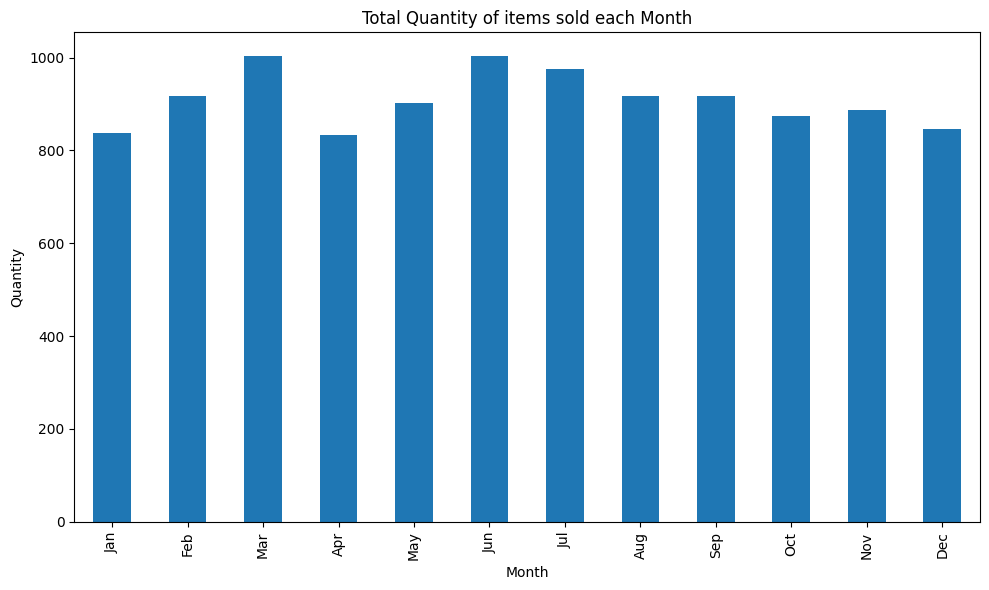

In [ ]:
import matplotlib.pyplot as plt

data['OrderDate'] = pd.to_datetime(data['OrderDate'])

copy_data = data.copy()

# Make a new data frame and add another column called Total quantity that exactly matches quantity
copy_data['TotalQuantity'] = copy_data['Quantity']

# Create a Series, use groupby() on the month and sum the quantities for each month
monthly_quantity = copy_data.groupby(data['OrderDate'].dt.month)['TotalQuantity'].sum()

# Filling months with no data as 0
monthly_quantity = monthly_quantity.reindex(range(1, 13), fill_value=0)  

# Convert month numbers to month names using appropriate indexing
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# Mutate the DataFrame to match months index with their names
monthly_quantity.index = month_names

# Define the size of the Bar Graph
plt.figure(figsize=(10, 6))
# Plot the total Quantity per Month as a bar chart
monthly_quantity.plot(kind='bar')
# Title for the Bar chart
plt.title('Total Quantity of items sold each Month')
#Set label for X and Y axis
plt.xlabel('Month')
plt.ylabel('Quantity')
#Adjust spacing of the bars to ensure they fit in the Spacing defined
plt.tight_layout()

plt.show()

# Find the most sold product in the month with the highest sales
<p style="font-size:16px;">In our previous block we hardcoded the value of the best selling month, lets find that dynamically so we can re-use this code in the future!  </p>

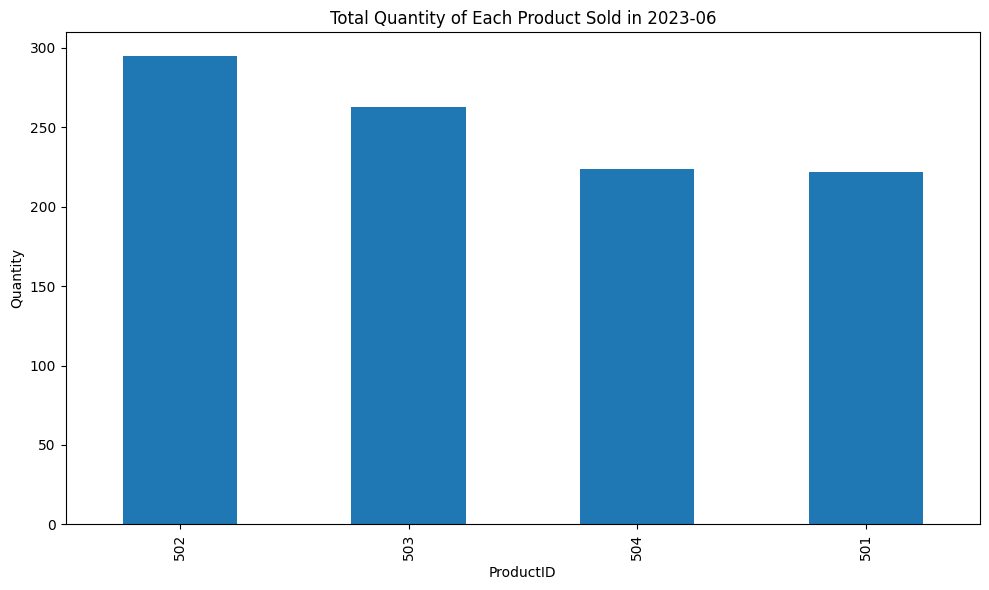

In [9]:
import matplotlib.pyplot as plt
# Ensure OrderDate is in datetime format
data['OrderDate'] = pd.to_datetime(data['OrderDate'])

# Aggregate total sales by month to find the month with highest sales
data['YearMonth'] = data['OrderDate'].dt.to_period('M')  # Create a year-month column for every row, will contain a year and month date.
monthly_sales = data.groupby('YearMonth')['Quantity'].sum()  # Sum quantities sold each month, use the sum method to create a new SERIES with yearMonth as the index and the value is the total quanitty sold for each month.
highest_sales_month = monthly_sales.idxmax()  # Find the month with the highest sales, the idmax function compares the values to find the highest then returns that items INDEX! not value.

# Filter data for the month with the highest sales
# create a new data frame containing all rows and columns that match the highest_sales_month
filtered_data = data[data['YearMonth'] == highest_sales_month]

# Calculate total Quantity per product for the highest sales month
quantity_per_product = filtered_data.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False)

# Define the size of the Bar Graph
plt.figure(figsize=(10, 6))
# Plot the total quantity per product as a bar chart
quantity_per_product.plot(kind='bar')
# Title for the Bar chart
plt.title(f'Total Quantity of Each Product Sold in {highest_sales_month}')
# Set label for X and Y axis
plt.xlabel('ProductID')
plt.ylabel('Quantity')
# Adjust spacing of the bars to ensure they fit in the defined spacing
plt.tight_layout()

plt.show()

# Total spending per city in the month with the highest sales


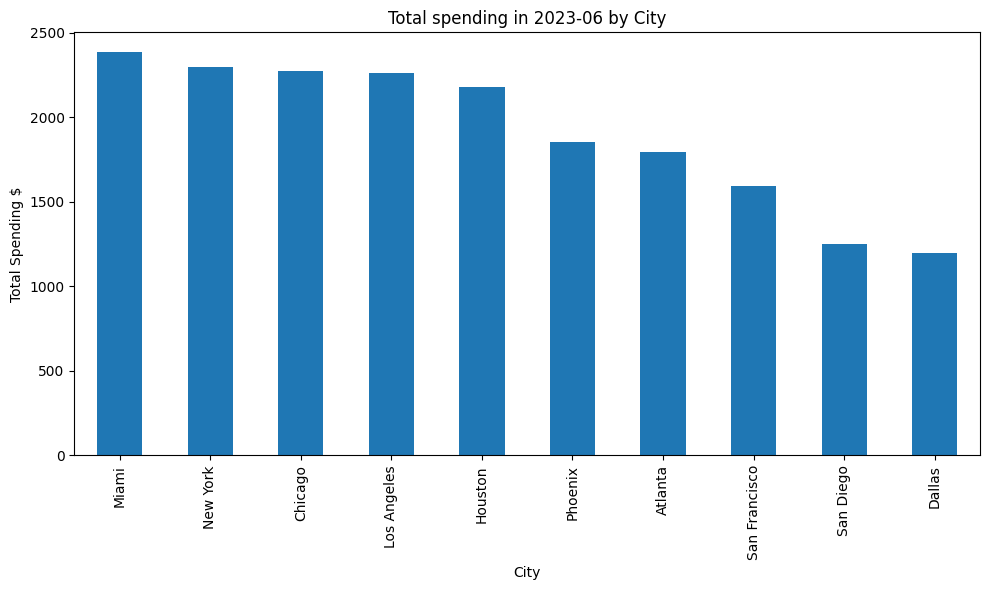

In [ ]:
import matplotlib.pyplot as plt

# Ensure OrderDate is in datetime format
data['OrderDate'] = pd.to_datetime(data['OrderDate'])

# Aggregate total sales by month to find the month with highest sales
data['YearMonth'] = data['OrderDate'].dt.to_period('M')  # Create a year-month column

monthly_sales = data.groupby('YearMonth')['Quantity'].sum()  # Sum quantities sold each month
#Find the index of the row with the highest monthly sales
highest_sales_month = monthly_sales.idxmax() 

# Filter data for the highest sales month
# the inner comparison returns a boolean true whenever a row matches the value
filtered_data = data[data['YearMonth'] == highest_sales_month].copy()

# Calculate total spending per city
filtered_data['TotalSpending'] = filtered_data['Price'] * filtered_data['Quantity']
# Create a series with the total that each City spent
spending_per_city = filtered_data.groupby('City')['TotalSpending'].sum().sort_values(ascending=False)

# Define the size of the Bar Graph
plt.figure(figsize=(10, 6))

# Plot the total spending per city as a bar chart
spending_per_city.plot(kind='bar')

# Title for the Bar chart - dynamically inserting month and year
plt.title(f'Total spending in {highest_sales_month} by City')

# Set label for X and Y axis
plt.xlabel('City')
plt.ylabel('Total Spending $')

# Adjust spacing of the bars to ensure they fit in the Spacing defined
plt.tight_layout()

plt.show()

# Total quantity of each product sold in Miami in may
<p style="font-size:16px;">This is a boring scatter plot but it does show which product sold the best in Miami in may.</p>

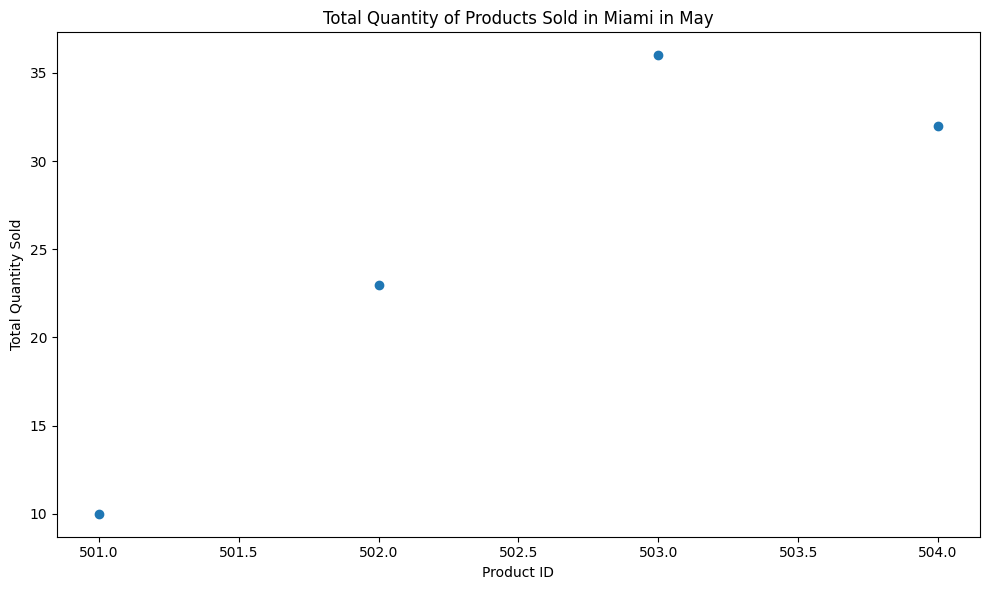

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'OrderDate' is in datetime format
data['OrderDate'] = pd.to_datetime(data['OrderDate'])

# Filter data for products sold in Miami during May (any year)
may_data_miami = data[(data['City'] == 'Miami') & (data['OrderDate'].dt.month == 5)].copy()

# Sum the quantities sold per product in May in Miami
total_quantity_per_product = may_data_miami.groupby('ProductID')['Quantity'].sum()

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Plotting the total quantity
plt.scatter(total_quantity_per_product.index, total_quantity_per_product.values)

# Title for the scatter plot
plt.title('Total Quantity of Products Sold in Miami in May')

# Set labels for X and Y axis
plt.xlabel('Product ID')
plt.ylabel('Total Quantity Sold')

# Adjust layout to ensure everything fits well
plt.tight_layout()

plt.show()

# Total quantity sold by city in the month with the highest sold items

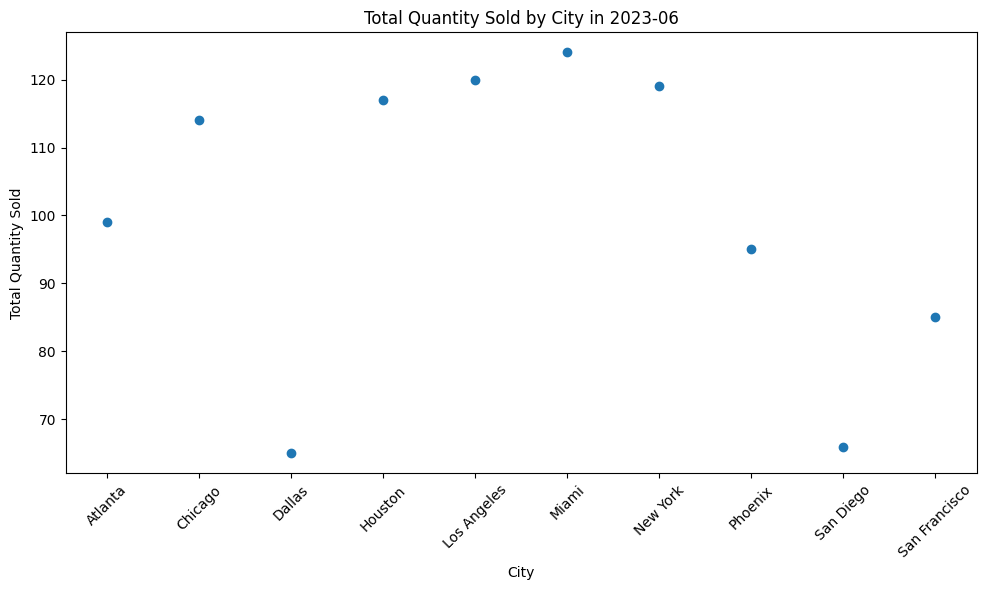

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'OrderDate' is in datetime format
data['OrderDate'] = pd.to_datetime(data['OrderDate'])

# Create a YearMonth column for easier aggregation
data['YearMonth'] = data['OrderDate'].dt.to_period('M')

# Find the month with the highest total quantity sold
monthly_sales = data.groupby('YearMonth')['Quantity'].sum()
highest_sales_month = monthly_sales.idxmax()

# Filter the data for that specific month
highest_sales_month_data = data[data['YearMonth'] == highest_sales_month]

# Summarize total quantity sold for each city
quantity_per_city = highest_sales_month_data.groupby('City')['Quantity'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))

# Plot city vs. total quantity of items sold
plt.scatter(quantity_per_city['City'], quantity_per_city['Quantity'])

# Title and labels
plt.title(f'Total Quantity Sold by City in {highest_sales_month}')
plt.xlabel('City')
plt.xticks(rotation=45)  # Rotate city names for better readability
plt.ylabel('Total Quantity Sold')

plt.tight_layout()

# Show the plot
plt.show()